In [1]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [5]:
# Import the Boston housing data set from sklearn and get description
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Create a bunch of samples, each with sample size of 20
sample_size = 20
n_samples = 25

samples = [housing_data.sample(sample_size) for i in range(0,n_samples)]
samples

[         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
 281   0.03705  20.0   3.33   0.0  0.4429  6.968   37.2  5.2447   5.0  216.0   
 257   0.61154  20.0   3.97   0.0  0.6470  8.704   86.9  1.8010   5.0  264.0   
 119   0.14476   0.0  10.01   0.0  0.5470  5.731   65.2  2.7592   6.0  432.0   
 259   0.65665  20.0   3.97   0.0  0.6470  6.842  100.0  2.0107   5.0  264.0   
 491   0.10574   0.0  27.74   0.0  0.6090  5.983   98.8  1.8681   4.0  711.0   
 146   2.15505   0.0  19.58   0.0  0.8710  5.628  100.0  1.5166   5.0  403.0   
 123   0.15038   0.0  25.65   0.0  0.5810  5.856   97.0  1.9444   2.0  188.0   
 128   0.32543   0.0  21.89   0.0  0.6240  6.431   98.8  1.8125   4.0  437.0   
 116   0.13158   0.0  10.01   0.0  0.5470  6.176   72.5  2.7301   6.0  432.0   
 178   0.06642   0.0   4.05   0.0  0.5100  6.860   74.4  2.9153   5.0  296.0   
 299   0.05561  70.0   2.24   0.0  0.4000  7.041   10.0  7.8278   5.0  358.0   
 214   0.28955   0.0  10.59   0.0  0.489

In [9]:
# Calculate standard error of means
means = [sample.MEDV.mean() for sample in samples]

sems = [sem(sample.MEDV) for sample in samples]
sems


[2.564946906191032,
 2.084906914494089,
 2.2687534253997628,
 1.5202540473292785,
 2.886967996103579,
 2.2785645873986913,
 2.422215981938418,
 2.454449236108088,
 2.342280434017017,
 1.842608277186959,
 2.6359585792608633,
 2.1475567512873783,
 2.5708476996385534,
 2.4078869858949163,
 2.6519255665509007,
 1.9140697891912763,
 1.5829598359103314,
 1.605515165723582,
 1.848943866387682,
 1.8500867689466833,
 2.134605534864389,
 1.911602730694848,
 2.804538380253654,
 1.0654002213154208,
 2.0323165418595077]

In [14]:
# Determine which sample's mean is closest to the population mean
min_sem = min(sems)
index_sample = sems.index(min_sem)
sample_index = index_sample+1

In [15]:
# Compare to the population mean
population_mean = housing_data.MEDV.mean()
samples_mean = samples[sample_index].MEDV.mean()
print(population_mean,samples_mean)

22.532806324110677 22.689999999999998


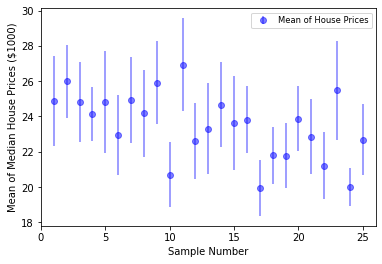

In [16]:
# Plot sample means with error bars
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($1000)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()